# 作業:
    請嘗試改用CIFAR100

# Import Library

In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [2]:
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar100.load_data()

print('train:',len(x_img_train))
print('test :',len(x_img_test))
print('x_img_train.shape   :', x_img_train.shape)
print('y_label_train.shape :', y_label_train.shape)
print('x_img_test.shape    :', x_img_test.shape)
print('y_label_test.shape :', y_label_test.shape)

169009152/169001437 [==============================] - 218s 1us/step
train: 50000
test : 10000
x_img_train.shape   : (50000, 32, 32, 3)
y_label_train.shape : (50000, 1)
x_img_test.shape    : (10000, 32, 32, 3)
y_label_test.shape : (10000, 1)


In [3]:
x_img_test[0]

array([[[199, 215, 249],
        [196, 211, 244],
        [195, 210, 243],
        ...,
        [216, 231, 250],
        [217, 231, 250],
        [224, 234, 252]],

       [[197, 210, 239],
        [195, 208, 238],
        [195, 210, 240],
        ...,
        [231, 243, 250],
        [233, 243, 250],
        [241, 245, 253]],

       [[222, 226, 246],
        [213, 220, 242],
        [209, 219, 243],
        ...,
        [243, 250, 251],
        [244, 249, 251],
        [250, 250, 253]],

       ...,

       [[ 72,  73,  99],
        [ 71,  74, 102],
        [ 74,  78, 108],
        ...,
        [220, 208, 217],
        [183, 168, 181],
        [155, 141, 150]],

       [[ 72,  75, 104],
        [ 76,  81, 111],
        [ 84,  89, 122],
        ...,
        [222, 212, 220],
        [187, 174, 192],
        [145, 132, 149]],

       [[ 80,  85, 118],
        [ 84,  90, 123],
        [ 85,  92, 127],
        ...,
        [217, 207, 215],
        [207, 194, 211],
        [176, 164, 183]]

In [4]:
# cifar100 ==> 100 categories
label_dict={0:'apple', 1:'aquarium_fish', 2:'baby', 3:'bear', 4:'beaver', 
            5:'bed',6:'bee', 7:'beetle', 8:'bicycle', 9:'bottle', 
            10:'bowl', 11:'boy', 12:'bridge', 13:'bus', 14:'butterfly', 
            15:'camel', 16:'can', 17:'castle', 18:'caterpillar', 19:'cattle', 
            20:'chair', 21:'chimpanzee', 22:'clock', 23:'cloud', 24:'cockroach', 
            25:'couch', 26:'crab', 27:'crocodile', 28:'cup', 29:'dinosaur', 
            30:'dolphin', 31:'elephant', 32:'flatfish', 33:'forest', 34:'fox', 
            35:'girl', 36:'hamster', 37:'house', 38:'kangaroo', 39:'keyboard', 
            40:'lamp', 41:'lawn_mower', 42:'leopard', 43:'lion', 44:'lizard', 
            45:'lobster', 46:'man', 47:'maple_tree', 48:'motorcycle', 49:'mountain', 
            50:'mouse', 51:'mushroom', 52:'oak_tree', 53:'orange', 54:'orchid', 
            55:'otter', 56:'palm_tree', 57:'pear', 58:'pickup_truck', 59:'pine_tree', 
            60:'plain', 61:'plate', 62:'poppy', 63:'porcupine', 64:'possum', 
            65:'rabbit', 66:'raccoon', 67:'ray', 68:'road', 69:'rocket', 
            70:'rose', 71:'sea', 72:'seal', 73:'shark', 74:'shrew', 
            75:'skunk', 76:'skyscraper', 77:'snail', 78:'snake', 79:'spider', 
            80:'squirrel', 81:'streetcar', 82:'sunflower', 83:'sweet_pepper', 84:'table', 
            85:'tank', 86:'telephone', 87:'television', 88:'tiger', 89:'tractor', 
            90:'train', 91:'trout', 92:'tulip', 93:'turtle', 94:'wardrobe', 
            95:'whale', 96:'willow_tree', 97:'wolf', 98:'woman', 99:'worm'}

In [7]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=100):
    fig = plt.gcf()
    fig.set_size_inches(24, 48)
    if num>100: num=100 
    for i in range(0, num):
        ax=plt.subplot(10,10, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

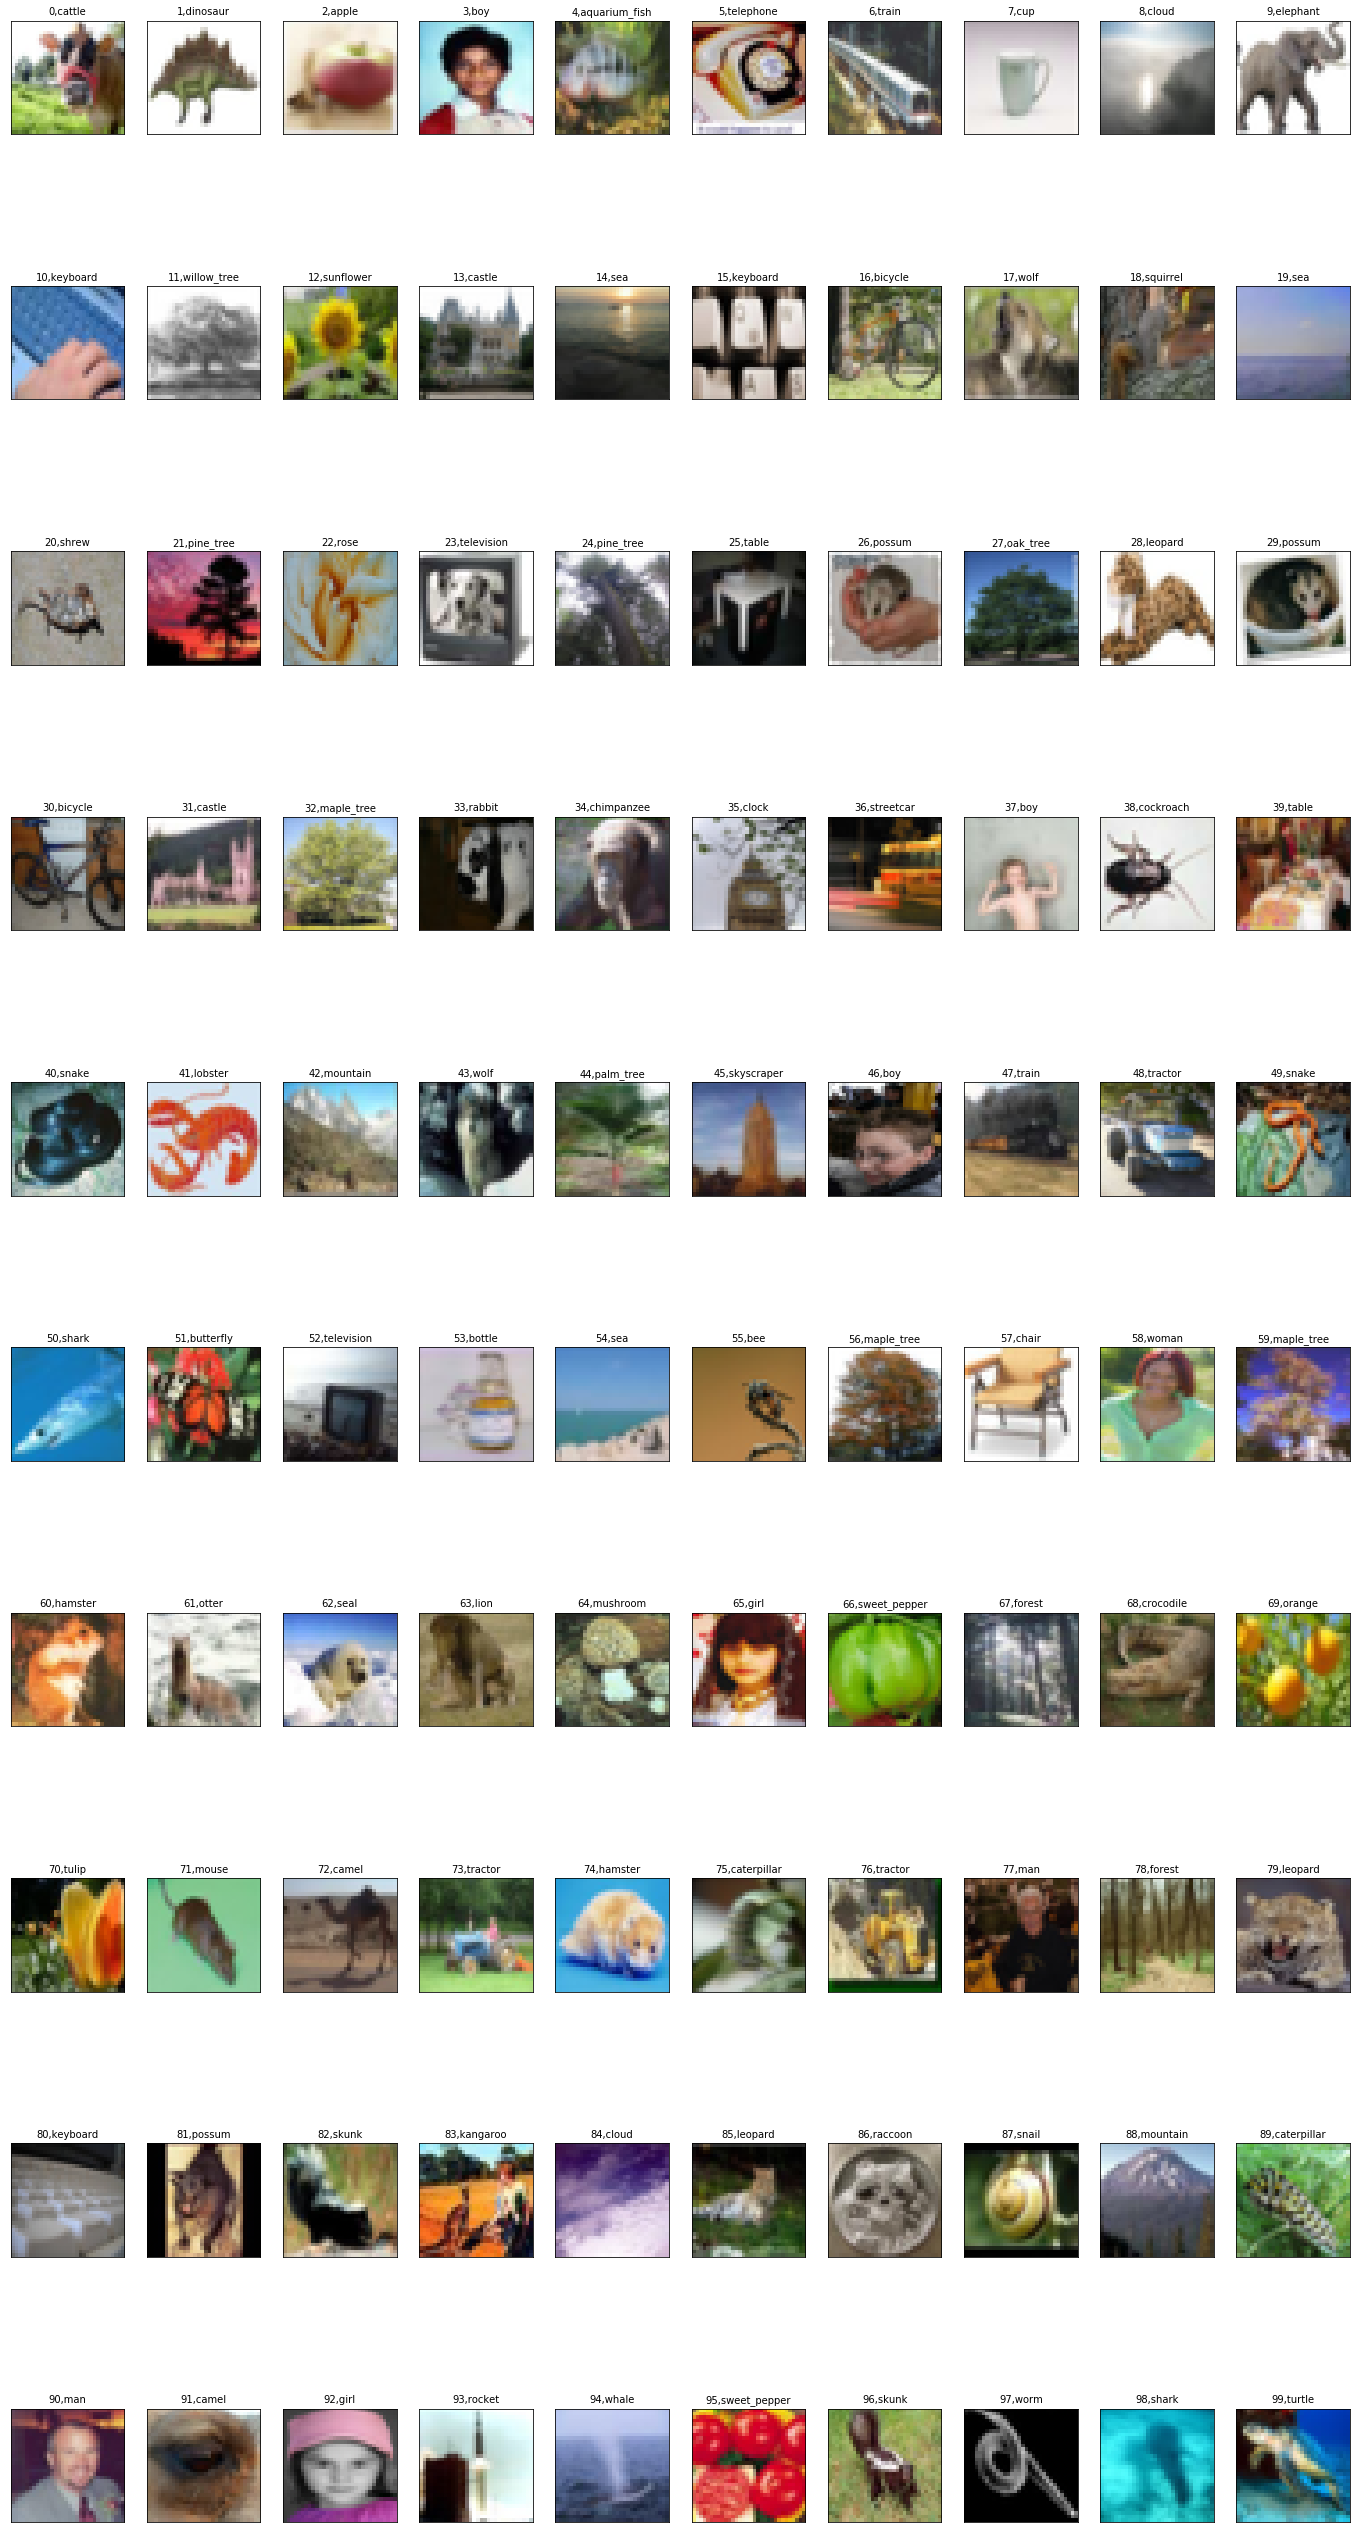

In [8]:
plot_images_labels_prediction(x_img_train,y_label_train,[],0)

# Image normalize 

In [9]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [10]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [11]:
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [12]:
y_label_train.shape

(50000, 1)

In [13]:
y_label_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [14]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [15]:
y_label_train_OneHot.shape

(50000, 100)

In [16]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.